# **STOCK MARKET PREDICTION AND FORCASTING USING STACKED**
**EXECUTED BY GODSPOWER UYANGA**

**In this model I used the Stacked Long Short Term Memory LSTM, an Artificial Intelligence Model for Stock Market Prediction. Stock market prediction is the act of determining the future revenue of a company stock or other financial instrument traded on a financial exchange. Here Will Use This Artificial Neural Network For Stock Market Prediction And Forecast**

# **Importing Neccessary Dependencies**

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

# **Data Collection**

In [2]:
stock_data = pd.read_csv("/content/NSE-TATAGLOBAL.csv")

In [3]:
stock_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


## **Exploratory Data Analysis**

In [4]:
# Checking The Shape Of The Data
stock_data.shape

(2035, 8)

In [6]:
# Check The Descriptive Statistics Of the Data
stock_data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
# Check Basic Information About The Data
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
stock_data_close = stock_data.reset_index()['Close']
stock_data_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [9]:
# Check For Null Value
stock_data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

## **Data Visualization**

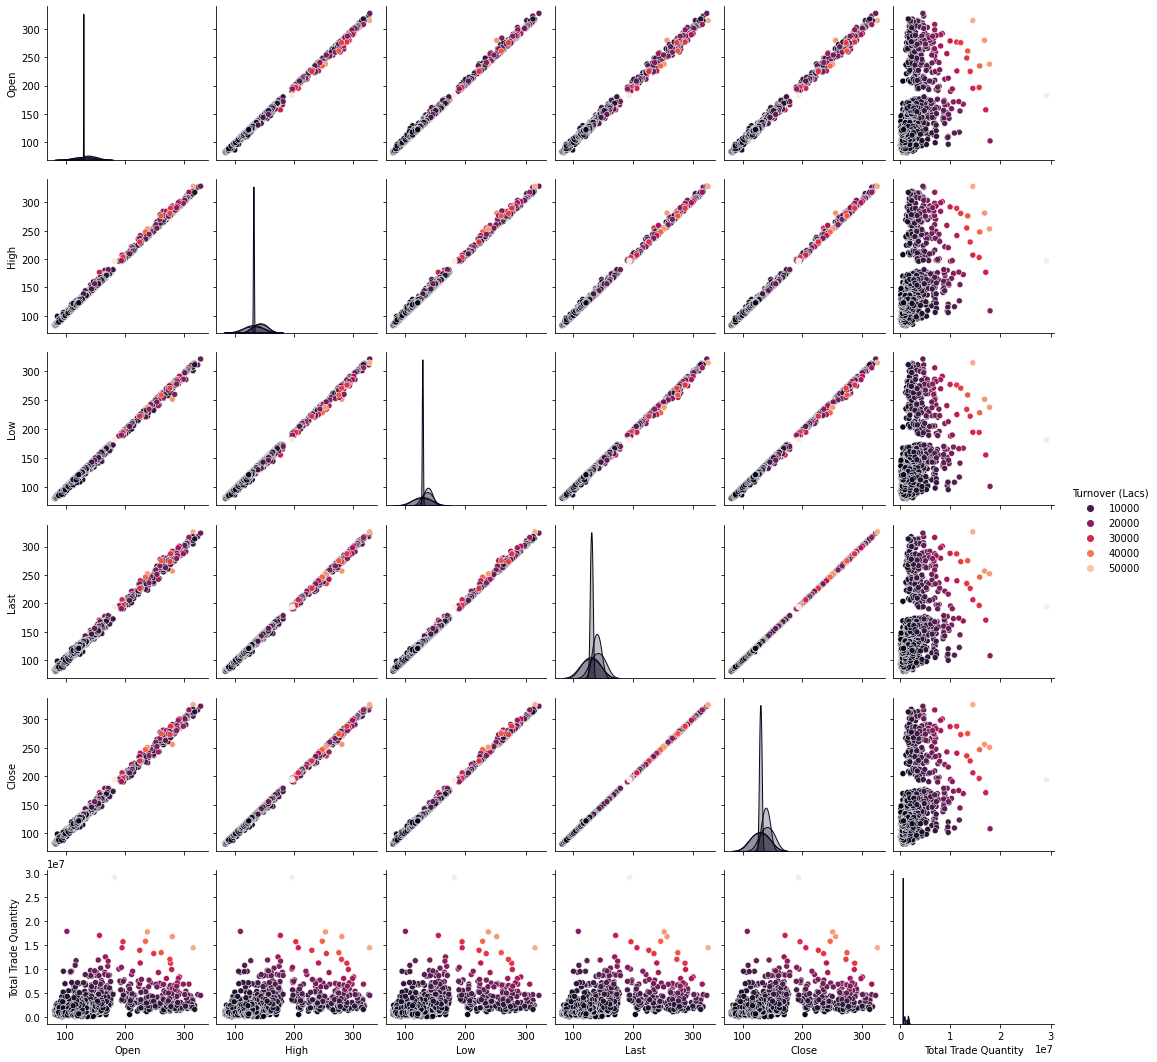

In [10]:
sns.pairplot(stock_data, hue= 'Turnover (Lacs)', palette= "rocket")
plt.show()

In [11]:
stock_data_close = stock_data.reset_index()['Close']
stock_data_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

## **Ploting The Close Value**

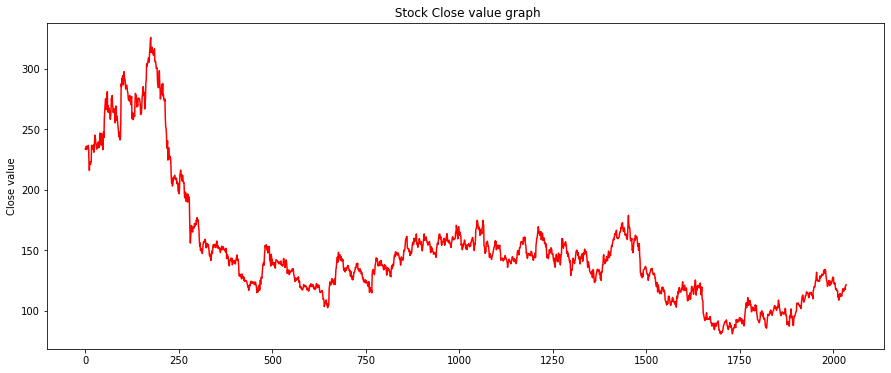

In [13]:
plt.figure(figsize=(15,6))
plt.plot(stock_data_close, c= "r")
plt.ylabel("Close value")
plt.title(' Stock Close value graph')
plt.show()

## **Graphical View Of Stock High Value**

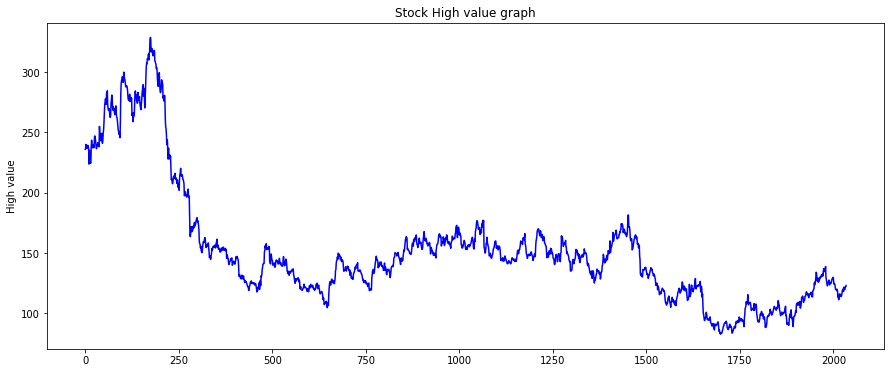

In [17]:
plt.figure(figsize=(15,6))

stock_data_high=stock_data.reset_index()['High']
plt.plot(stock_data_high, c="b")
plt.ylabel("High value")
plt.title('Stock High value graph')
plt.show()

## **Open Stock Graph**

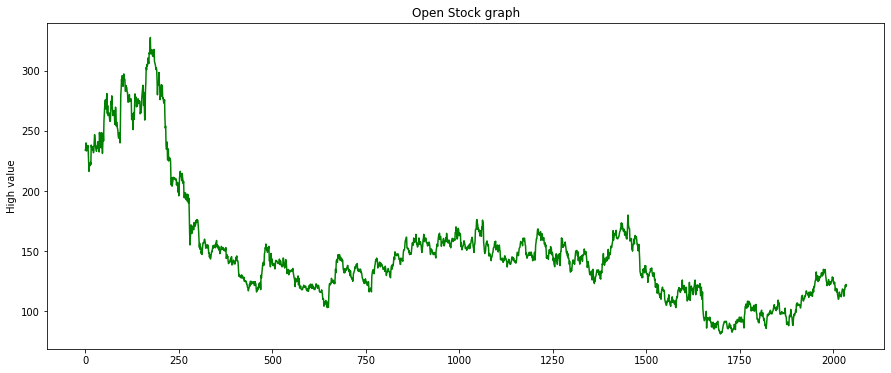

In [18]:
plt.figure(figsize=(15,6))

stock_data_open=stock_data.reset_index()['Open']
plt.plot(stock_data_open, c="g")
plt.ylabel("High value")
plt.title('Open Stock graph')
plt.show()

## **Data Scaling**
Since Long Short Term Memory LSTM are sensitive to the scale of the data, so we apply MinMax Scaler to transform our values between 0 and 1

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
stock_data_high = scaler.fit_transform(np.array(stock_data_high).reshape(-1,1))
stock_data_high

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

In [20]:
stock_data_high.shape

(2035, 1)

## **Training Testing And Spliting**
**In time-series data the one data is dependent on other data. The training size should be 75% of the total length of the data frame, the test size should be the difference between the length of the dataset and the training size.**

In [21]:
training_size = int(len(stock_data_high) * 0.75)
test_size = len(stock_data_high) - training_size
train_data, test_data = stock_data_high[0:training_size,:], stock_data_high[training_size:len(stock_data_high),:1]

In [23]:
print('The Stock Training Data Size:',train_data.size)
print('The Stock Testing Data Size :',test_data.size)

The Stock Training Data Size: 1526
The Stock Testing Data Size : 509


# **Data Preprocessing**

In [24]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [25]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

# **Applying Long Short Term Memory Technique**
**We Need to Reshape the input to be [samples, time steps, features] which is the Major requirement of Long Short Term Memory LSTM**

In [26]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [29]:
print("X Training Data Shape :" ,x_train.shape)
print("X testing Data Shape  :" ,x_test.shape)
print("Y Training Data Shape :" ,y_train.shape)
print("Y Tresting Data Shape :" ,y_test.shape)

X Training Data Shape : (1425, 100, 1)
X testing Data Shape  : (408, 100, 1)
Y Training Data Shape : (1425,)
Y Tresting Data Shape : (408,)


# **Import Important LSTM Module And Dependencies**

In [30]:
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [32]:
# Confirming My TensorFlow Version
tf.__version__

'2.9.2'

# **Creating LSTM Model**

In [37]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## **Model Training**

In [39]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 16s 357ms/step - loss: 0.0310 - val_loss: 0.0074
Epoch 2/100
23/23 [==============================] - 7s 325ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 3/100
23/23 [==============================] - 7s 323ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 4/100
23/23 [==============================] - 7s 322ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 5/100
23/23 [==============================] - 7s 323ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/100
23/23 [==============================] - 7s 323ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/100
23/23 [==============================] - 7s 325ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/100
23/23 [==============================] - 7s 325ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/100
23/23 [==============================] - 7s 324ms/step - loss: 0.0011 - val_loss: 7.1504e-04
Epoch 10/100
23/23 [==============================] - 8s 327ms/step - loss: 0.0013 - v

# **Predicting And Checking the Performance Metrics**

In [40]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

## **Transforming Back To Original Form**

In [41]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

## **Calculating RSME**

### **Calculate RMSE performance metrics**

In [42]:
math.sqrt(mean_squared_error(y_train, train_predict))

162.65494767582993

### **Test Data RMSE**

In [43]:
math.sqrt(mean_squared_error(y_test, test_predict))

107.63766942064488

## **Ploting The Graph Between Training and Testing Data**

In [44]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(stock_data_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(stock_data_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(stock_data_high) - 1, :] = test_predict

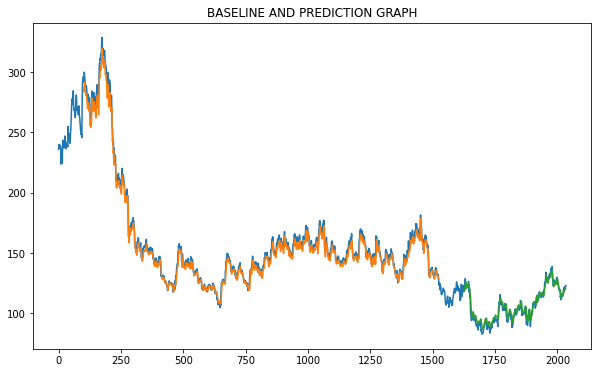

The Green Color indicates the Predicted Stock Data
The Blue Color indicates the Complete Stock Data
The Orange Color indicates the Stock Train Data


In [48]:
#Plot baseline and predictions
plt.figure(figsize=(10,6))

plt.plot(scaler.inverse_transform(stock_data_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title("BASELINE AND PREDICTION GRAPH")
plt.show()

print("The Green Color indicates the Predicted Stock Data")
print("The Blue Color indicates the Complete Stock Data")
print("The Orange Color indicates the Stock Train Data")

# **Predict The Next 28 Days Stock Price**

In [49]:
print("Length of Test Stock Data : ",len(test_data))
print("Shape of x Test Stock Data :",x_test.shape)

Length of Test Stock Data :  509
Shape of x Test Stock Data : (408, 100, 1)


In [50]:
x_input=test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

# **Predicting Stock Values For The Next 40 Days**

In [53]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [74]:
lst_output=[]
n_steps=100
i=0
while(i<40):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.14948905 0.14860427 0.14778171 0.14701758 0.14630835 0.14565098
 0.14504278 0.14448124 0.14396404 0.14348887 0.14305325 0.14265482
 0.14229099 0.14195926 0.14165697 0.14138164 0.14113075 0.14090197
 0.14069308 0.14050196 0.14032677 0.14016581 0.14001745 0.13988039
 0.13975336 0.13963535 0.13952543 0.13942268 0.13932659 0.13923636
 0.13915163 0.13907181 0.13899659 0.13892564 0.1388586  0.13879529
 0.1387354  0.13867879 0.13862526 0.13857463 0.1385268  0.13848157
 0.13843882 0.13839848 0.13836037 0.13832444 0.13829055 0.13825861
 0.13822852 0.13820019 0.13817355 0.13814846 0.1381249  0.13810278
 0.138082   0.13806248 0.13804415 0.138027   0.13801086 0.13799575
 0.13798156 0.1379683  0.13795583 0.13794413 0.13793319 0.13792296
 0.13791333 0.13790435 0.13789591 0.13788798 0.13788059 0.13787362
 0.13786711 0.13786101 0.13785526 0.1378499  0.13784483 0.13784014
 0.13783568 0.13783154 0.13782761 0.13782395 0.13782053 0.13781731
 0.13781428 0.13781142 0.13780878 0.13780628 0.137

In [75]:
day_new = np.arange(1,101)
day_pred = np.arange(101,141)
print(f'Actual Shape Of Stock Values For 100 Days:{day_new.shape}')
print(f'Predicted Shape Of Stock Values Shape For 40 days:{day_pred.shape}')

Actual Shape Of Stock Values For 100 Days:(100,)
Predicted Shape Of Stock Values Shape For 40 days:(40,)


## **Graph Between actual values in last 100 days And Predicted Stock Values In 40 Days**

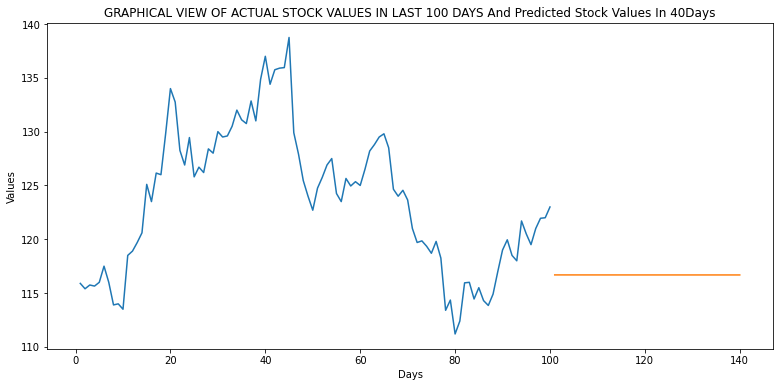

In [76]:
plt.figure(figsize=(13,6))

plt.plot(day_new, scaler.inverse_transform(stock_data_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))
plt.title("GRAPHICAL VIEW OF ACTUAL STOCK VALUES IN LAST 100 DAYS And Predicted Stock Values In 40Days")
plt.xlabel('Days')
plt.ylabel('Values')

plt.show()

### **The Blue Color Line Shows The Actual Stock Value Trend In Last 100 Days**

### **The Red Color Line Shows The Predicted Stock Value Trend In Next 40 Days**

In [79]:
stock_data3 = stock_data_high.tolist()
stock_data3.extend(lst_output)
len(stock_data_high), len(stock_data3)

(2035, 2075)

# **Graphical Visualization Of Predicted Stock Value For Last 75 Days**

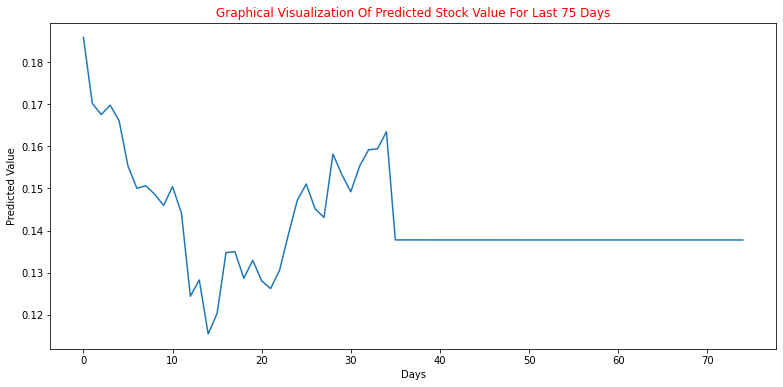

In [91]:
plt.figure(figsize=(13,6))

stock_data2=stock_data_high.tolist()
stock_data2.extend(lst_output)
plt.plot(stock_data2[2000:])
plt.title("Graphical Visualization Of Predicted Stock Value For Last 75 Days", color = "r")
plt.xlabel("Days")
plt.ylabel("Predicted Value")
plt.show()

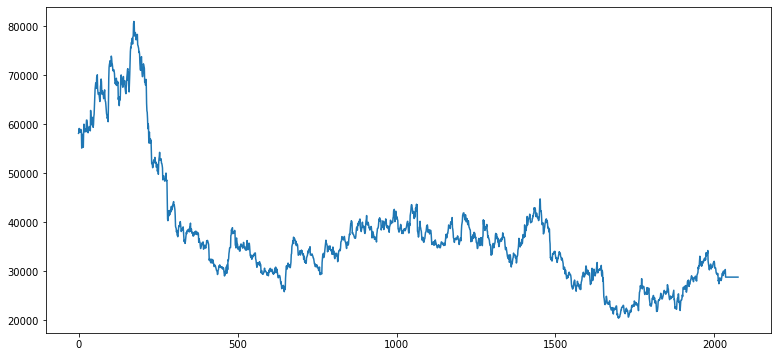

In [93]:
plt.figure(figsize=(13,6))
stock_data2=scaler.inverse_transform(stock_data2).tolist()
plt.plot(stock_data2)
plt.show()

# **Our Forecast Was Sucessfull And Model Created As Required Using Stacked LSTM**